In [1]:
%matplotlib inline
import math
import numpy
from matplotlib import pyplot
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache(manifest_file='data/manifest.json')
# grab the Ontology instance
ontology = mcc.get_ontology()

In [2]:
ontology.df

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
id,,,,,,,,,,,,,,,,,,,,,
997,root,-1,FFFFFF,0,False,734881840,1,0,3,997,...,NaN,NaN,1,NaN,root,1,NaN,/997/,385153371,8690
8,grey,0,BFDAE3,1,False,734881840,1,1,3,8,...,NaN,NaN,1,997,Basic cell groups and regions,2,NaN,/997/8/,2244697386,8690
567,CH,70,B0F0FF,2,False,734881840,1,2,3,567,...,NaN,NaN,1,8,Cerebrum,3,NaN,/997/8/567/,2878815794,8690
688,CTX,85,B0FFB8,3,False,734881840,1,3,3,688,...,NaN,NaN,1,567,Cerebral cortex,4,NaN,/997/8/567/688/,3591311804,8690
695,CTXpl,86,70FF70,4,False,734881840,1,4,3,695,...,NaN,NaN,1,688,Cortical plate,5,NaN,/997/8/567/688/695/,3945900931,8690
315,Isocortex,746,70FF71,5,False,734881840,1,5,3,315,...,NaN,NaN,1,695,Isocortex,6,NaN,/997/8/567/688/695/315/,2323732626,8690
184,FRP,871,268F45,6,False,734881840,1,6,3,184,...,NaN,NaN,1,315,Frontal pole cerebral cortex,7,NaN,/997/8/567/688/695/315/184/,2565719060,8690
68,FRP1,998,268F45,7,False,734881840,1,7,3,68,...,NaN,NaN,1,184,Frontal pole layer 1,8,NaN,/997/8/567/688/695/315/184/68/,1397862467,8690
667,FRP2/3,1073,268F45,7,False,734881840,1,8,3,667,...,NaN,NaN,1,184,Frontal pole layer 2/3,9,NaN,/997/8/567/688/695/315/184/667/,4268100038,8690


In [3]:
tree_levels = [[] for i in range(0, 12)]
childs_map = dict()

for i in range(0, 12):
    level_ids = []
    for a in ontology.df.values:
        if (i == 0 and math.isnan(a[14])) or (i > 0 and a[14] in tree_levels[i - 1]):
            level_ids.append(a[9])
            childs_map[a[9]] = []
    tree_levels[i] = level_ids
    
for i in range(11, 0, -1):
    for a in ontology.df.values:
        if a[14] in tree_levels[i - 1]:
            childs_map[a[14]].append(a[9])
            childs_map[a[14]].extend(childs_map[a[9]])

parents = set([a[14] for a in ontology.df.values if not math.isnan(a[14])])
print "PARENTS:", len(parents)
leafs = [(a[0], a[9]) for a in ontology.df.values if a[9] not in parents]
leaf_ids = [l[1] for l in leafs]
print "LEAFS:", len(leafs), " of ", len(ontology.df.values), "MIN:", min(leaf_ids), "MAX:", max(leaf_ids)

def find_matching_tree_level(node_id):
    for i, arr_ids in enumerate(tree_levels):
        if node_id in arr_ids:
            return i+1
    return -1


PARENTS: 278
LEAFS: 956  of  1234 MIN: 1 MAX: 312782652


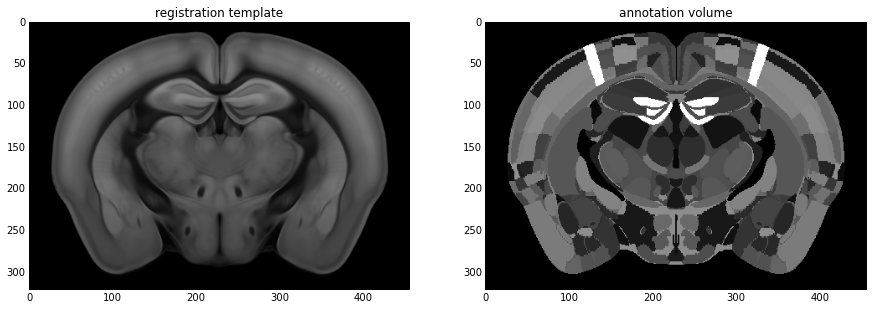

In [4]:
template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# show that slice of all volumes side-by-side
f, ((ax1, ax2)) = pyplot.subplots(1, 2, figsize=(15, 6))
# pick a slice to show
slice_idx = 264

ax1.imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ax1.set_title("registration template")

ax2.imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ax2.set_title("annotation volume")

In [5]:
print template.min(), template.max(), annot.min(), annot.max()

0 516 0 312782652


In [6]:
annot_info

{u'dimension': 3,
 u'encoding': 'gzip',
 u'endian': 'little',
 u'keyvaluepairs': {},
 u'kinds': ['domain', 'domain', 'domain'],
 u'sizes': [528, 320, 456],
 u'space': 'left-posterior-superior',
 u'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']],
 u'space origin': ['0', '0', '0'],
 u'type': 'unsigned int'}

In [7]:
found_ann = numpy.unique(annot)
print len(numpy.unique(template)), "distinct annotations", len(found_ann)

517 distinct annotations 589


In [8]:
all_region_idx = [a[9] for a in ontology.df.values]
background_idx = [ann for ann in found_ann if ann not in all_region_idx]
print "Background Value(s)", background_idx

Background Value(s) [0]


In [9]:
conn2voxels = {a[9]: (find_matching_tree_level(a[9]), a[0], (annot == a[9]).sum())
               for a in ontology.df.values}

In [10]:
mapped_regions = []
not_mapped_regions= []
for l in range(1, 11):
    ## ID, LABEL, VOXELS_NO
    level_data = [(i, a[1], a[2]) for i, a in conn2voxels.iteritems() if a[0]==l and a[2] >0]
    no_voxels = set([a[1] for i, a in conn2voxels.iteritems() if a[0]==l and a[2] ==0])
    voxels = set([i for i, a in conn2voxels.iteritems() if a[0]==l and a[2] >0])
    mapped_regions.extend(voxels)
    not_mapped_regions.extend(no_voxels)
    print "================================"
    print "LEVEL", l 
    print "Regions with no associated voxels:", len(no_voxels), no_voxels
    print ""
    print "Regions with at least one voxel associated:", len(level_data)
    print level_data
    
print "Total no of regions with associated voxels:", len(mapped_regions), "total not associated", len(not_mapped_regions)

LEVEL 1
Regions with no associated voxels: 0 set([])

Regions with at least one voxel associated: 1
[(997, 'root', 40)]
LEVEL 2
Regions with no associated voxels: 3 set(['grv', 'retina', 'grey'])

Regions with at least one voxel associated: 2
[(73, 'VS', 18385), (1009, 'fiber tracts', 236648)]
LEVEL 3
Regions with no associated voxels: 11 set(['IVF', 'CH', 'cbf', 'cm', 'eps', 'mfbs', 'BS', 'IPF', 'grv of CBX', 'lfbs', 'grv of CTX'])

Regions with at least one voxel associated: 6
[(81, 'VL', 159548), (129, 'V3', 82850), (140, 'AQ', 28584), (512, 'CB', 1), (145, 'V4', 50656), (164, 'c', 80)]
LEVEL 4
Regions with no associated voxels: 50 set(['vsp', 'cbc', 'ipf', 'ppf', 'pms', 'eg', 'CTX', 'SEZ', 'cbp', 'sec', 'epsc', 'IIIn', 'HB', 'Vn', 'apf', 'mfbc', 'vrt', 'icf', 'nf', 'tn', 'chpl', 'rf', 'XIIn', 'sif', 'RC', 'pcf', 'ri', 'pce', 'CNU', 'chfl', 'sst', 'pri', 'mfsbshy', 'VIn', 'plf', 'pfs', 'rst', 'Xn', 'IB', 'hf', 'psf', 'IXn', 'CBN', 'drt', 'XIn', 'lfbst', 'ctb', 'In', 'VIIIn', 'CBX'])

In [11]:
#Find conflicting mappings
for m in mapped_regions:
    my_children = childs_map[m]
    children_mapped = set(my_children).intersection(mapped_regions)
    children_mapped = [conn2voxels[c] for c in children_mapped]
    if children_mapped:
        print "================================"
        print "Conflict between parent associations for node:", m, conn2voxels[m]
        if len(children_mapped) > 20:
            print "and ", len(children_mapped), "child nodes (all with associated voxels as well)"
        else:
            print "and children with voxels", children_mapped


Conflict between parent associations for node: 997 (1, 'root', 40)
and  587 child nodes (all with associated voxels as well)
Conflict between parent associations for node: 73 (2, 'VS', 18385)
and children with voxels [(3, 'V3', 82850), (3, 'c', 80), (3, 'V4', 50656), (3, 'AQ', 28584), (3, 'VL', 159548), (4, 'V4r', 53228)]
Conflict between parent associations for node: 1009 (2, 'fiber tracts', 236648)
and  56 child nodes (all with associated voxels as well)
Conflict between parent associations for node: 512 (3, 'CB', 1)
and children with voxels [(6, 'CUL', 448510), (6, 'PRM', 315291), (6, 'FOTU', 58946), (6, 'SIM', 351345), (6, 'DEC', 239591), (6, 'COPY', 155348), (5, 'DN', 21468), (6, 'UVU', 140142), (6, 'LING', 7942), (6, 'PFL', 356892), (6, 'AN', 733048), (6, 'NOD', 80661), (6, 'PYR', 58832), (6, 'CENT', 250358), (6, 'FL', 84339), (5, 'IP', 55207), (5, 'FN', 32651)]
Conflict between parent associations for node: 145 (3, 'V4', 50656)
and children with voxels [(4, 'V4r', 53228)]
Confli